In [19]:
import sys
sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
from matplotlib.pyplot import*
import fileread as fr
import predefined as pd
import wave_ops as wo
import time
import numpy as np

def calibrate(energy_type,board,channel): 
    bdch=int(board*8+channel) 
    if bdch ==6: 
        m,b=1/6.28,3.46 
    elif bdch==11: 
        m,b=1/6.43,-10.1 
    elif bdch==35: 
        m,b=1/6.18,43.7 
    elif bdch==12: 
        m,b=1/6.24,-21.82 
    else: 
        m,b=0,0   
    return (energy_type+b)*m  
vec_calibrate=np.vectorize(calibrate)

data=fr.gen_output('/home/noah/Desktop/large_analysis/ca_analysis/cur_data/Run_120-all.dat')[0]

In [21]:
energy_type='energy'
cut=data.copy()
cut[energy_type]=vec_calibrate(cut[energy_type],cut['board'],cut['channel'])
cut=cut[cut[energy_type]>15]
cut=cut[cut[energy_type]<300]
cut=cut[cut['t0']>600]
cut.sort(order='timestamp')
beg=time.time()
cut=cut[pd.doubles(cut,energy_type)]

i,j=0,0
while i<len(cut)-1 and j<len(cut)-1:
    j=i+1
    backscattering=cut['timestamp'][j]-cut['timestamp'][i] < twindow
    energy=cut[energy_type][i]
    while backscattering and j<len(cut)-1:
        energy+=cut[energy_type][j]
        cut[energy_type][j]=-10
        j+=1
        backscattering=cut['timestamp'][j]-cut['timestamp'][i] < twindow
    cut[energy_type][i]=energy
    i=j
print(time.time()-beg)



NameError: name 'twindow' is not defined

[  12.5   13.5   14.5 ... 1997.5 1998.5 1999.5] [119. 222. 303. ...   6.   3.  12.]


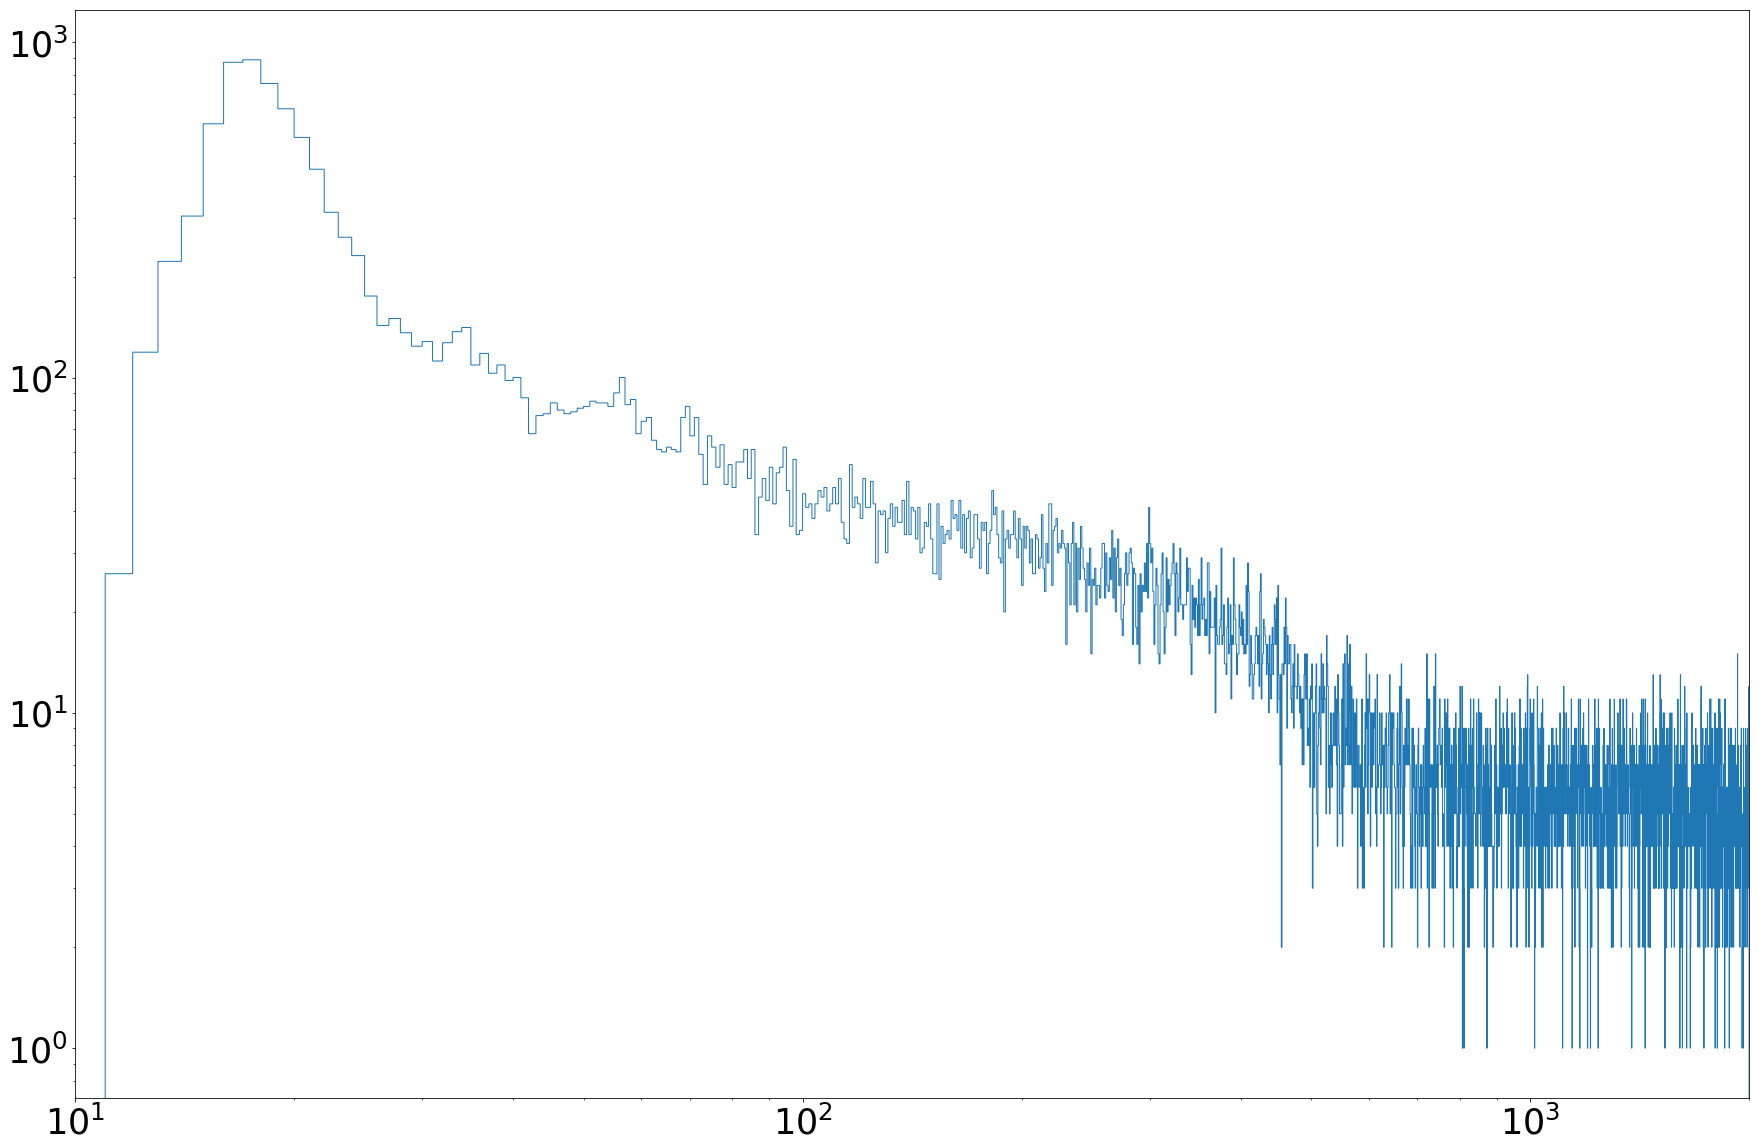

In [18]:
f=lambda x,a,m: a*np.power(x,m)

fs=35
figure(figsize=(30,20))
h,b,p=hist(-cut['pilediff'][cut.pileup==2],bins=3000,range=[-1000,2000],histtype='step')
b=pd.cbins(b)
print(b[b>12],h[b>12])
yscale('log')
xscale('log')
xlim(10,2e3)

beg,end=12,8e2
trutharray=b[pd.land(b>beg,b<end)]

tick_params(labelsize=fs)
show()

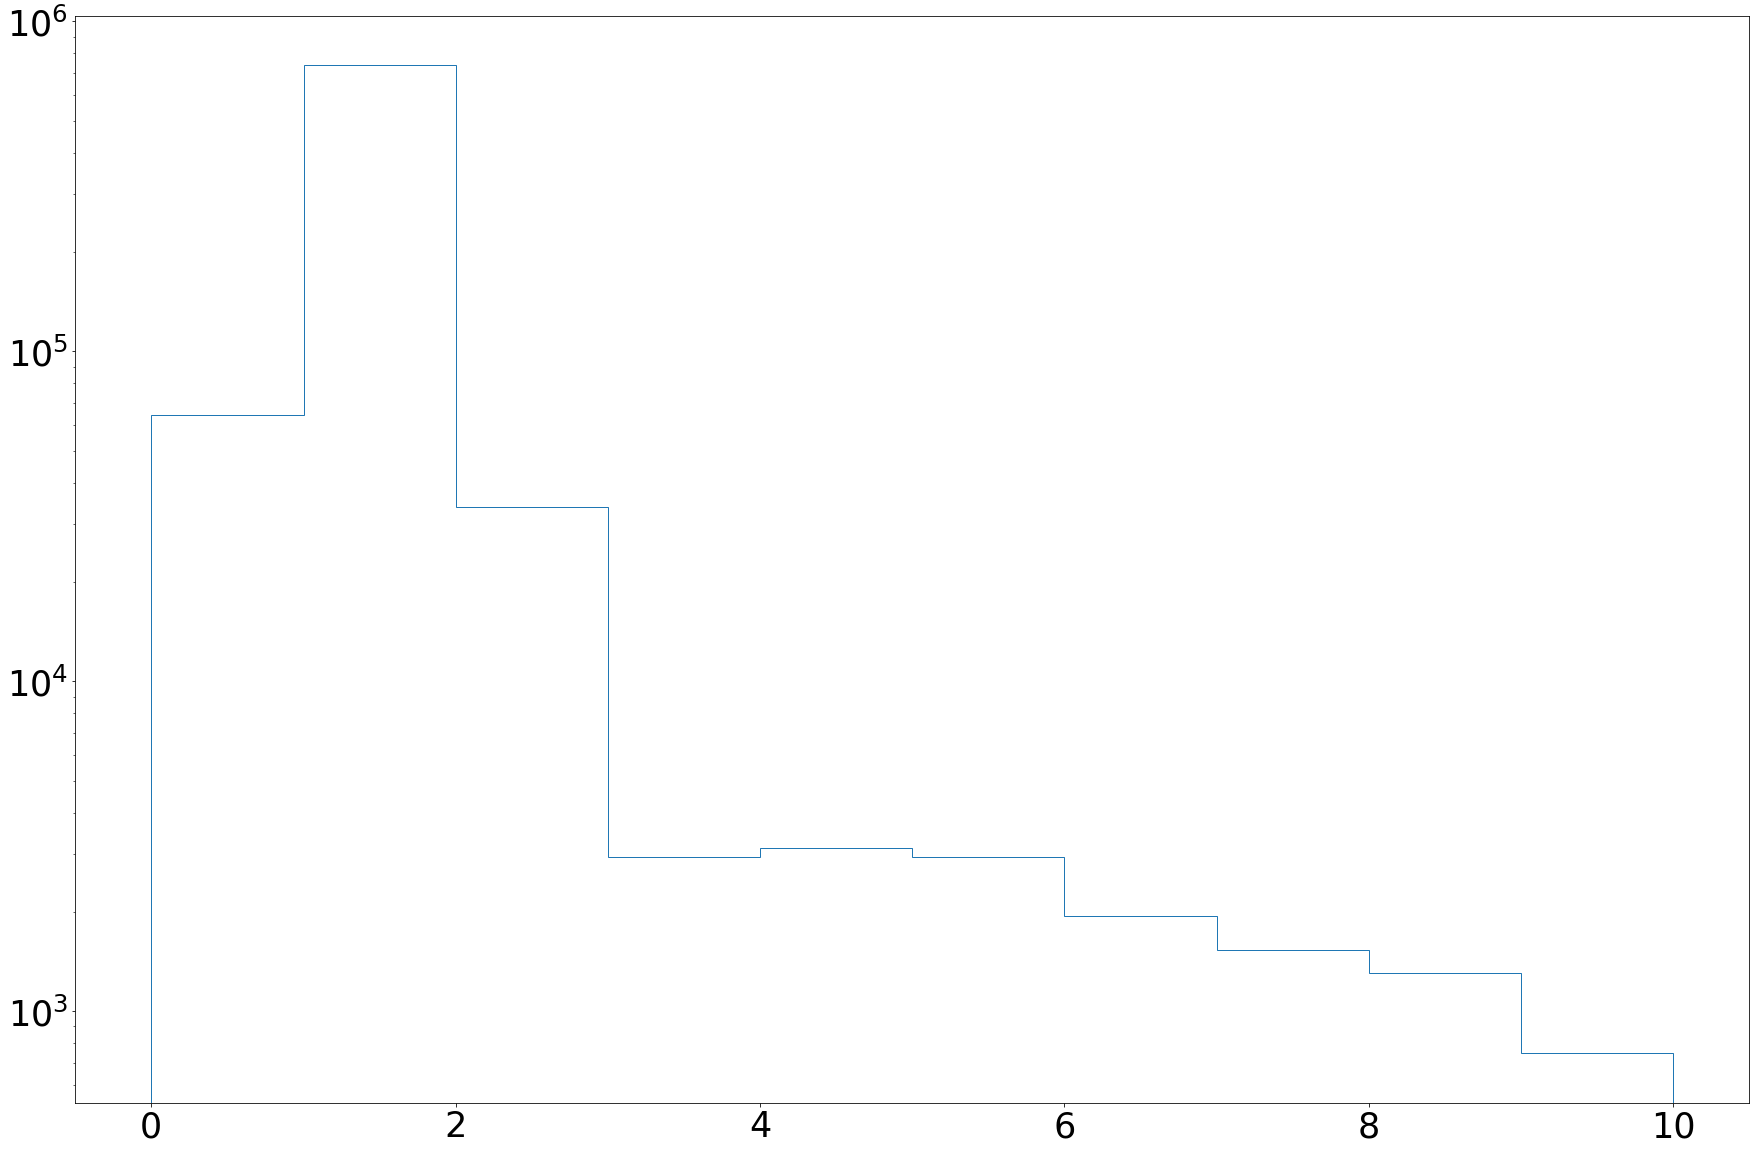

In [9]:
fs=35
figure(figsize=(30,20))
hist(cut['pileup'],bins=10,range=[0,10],histtype='step')
yscale('log')
tick_params(labelsize=fs)
show()